#1.  Write a code to generate $N$ samples of gaussian in an i.i.d. manner with mean vector $\mu = [3, 4, -5]$ and covariance $\Sigma = 1.2 \times I_{3 \times 3}$. Use these $N$ samples to compute ML and MMSE estimates of the mean vector. Empirically show that as $N$ becomes larger, the mean square error goes down with $N$ for both the estimates.
**Note:** Read about ML and MMSE estimates.





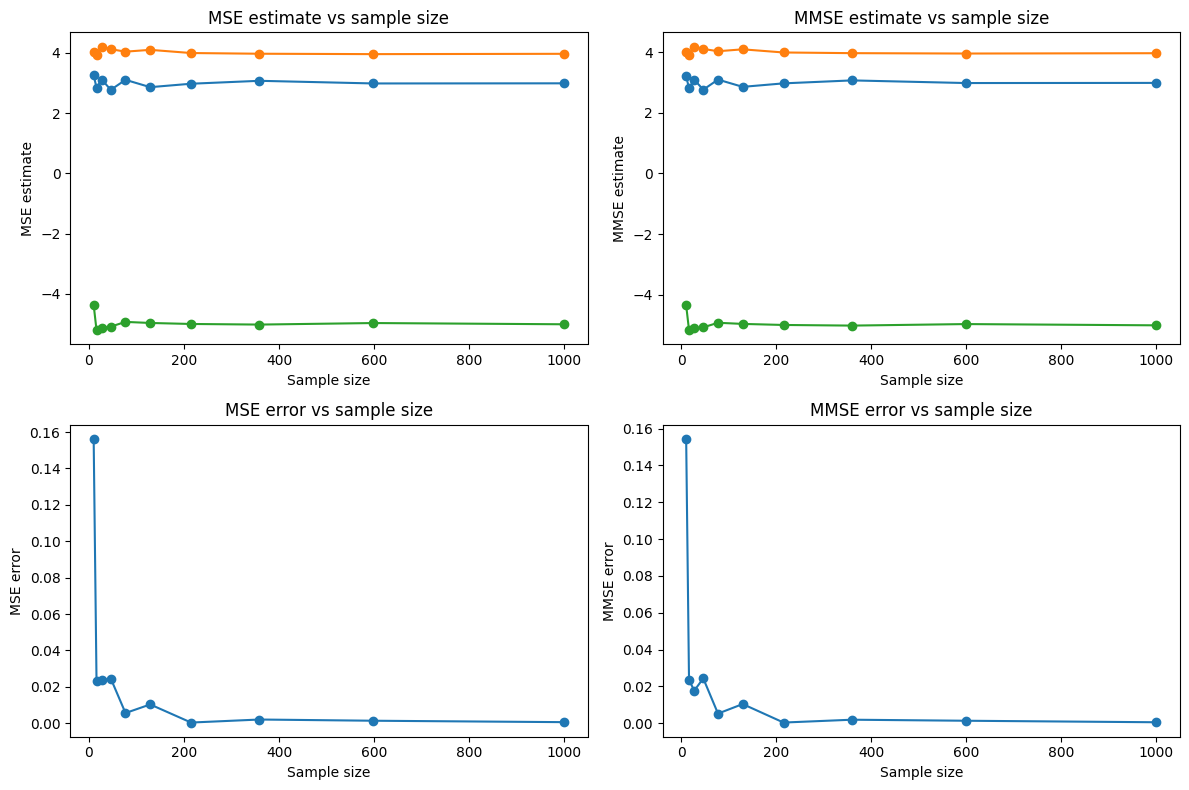

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# true mean vector and covariance matrix of the gaussian distribution
true_mean = np.array([3, 4, -5])
true_cov = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])

#  prior mean vector and covariance matrix for the MMSE estimation
prior_mean = np.array([2, 3, -4])
prior_cov = np.array([[2, 0, 0], [0, 2, 0], [0, 0, 2]])

# function that takes a sample size N and returns the MSE and MMSE estimates of the mean vector, and the mean squared errors of both estimates
def estimate_mean(N):
    # Generate N samples of gaussian distribution with the true mean and covariance
    samples = np.random.multivariate_normal(true_mean, true_cov, size=N)

    #  maximum likelihood estimate of the mean vector
    ml_mean = np.mean(samples, axis=0)

    # MMSE estimate of the mean vector
    mmse_mean = (prior_cov @ np.linalg.inv(prior_cov + true_cov / N)) @ ml_mean + (true_cov / N @ np.linalg.inv(prior_cov + true_cov / N)) @ prior_mean

    #  mean squared errors of both estimates
    mse_error = mean_squared_error(true_mean, ml_mean)
    mmse_error = mean_squared_error(true_mean, mmse_mean)


    return ml_mean, mmse_mean, mse_error, mmse_error

# list of sample sizes for testingg
sample_sizes = np.logspace(1, 3, 10, dtype=int)


ml_means = []
mmse_means = []
mse_errors = []
mmse_errors = []

# Loop over the sample sizes and call the estimate_mean function for each one
for N in sample_sizes:
    ml_mean, mmse_mean, mse_error, mmse_error = estimate_mean(N)
    ml_means.append(ml_mean)
    mmse_means.append(mmse_mean)
    mse_errors.append(mse_error)
    mmse_errors.append(mmse_error)


plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(sample_sizes, ml_means, 'o-')
plt.xlabel('Sample size')
plt.ylabel('MSE estimate')
plt.title('MSE estimate vs sample size')
plt.subplot(2, 2, 2)
plt.plot(sample_sizes, mmse_means, 'o-')
plt.xlabel('Sample size')
plt.ylabel('MMSE estimate')
plt.title('MMSE estimate vs sample size')
plt.subplot(2, 2, 3)
plt.plot(sample_sizes, mse_errors, 'o-')
plt.xlabel('Sample size')
plt.ylabel('MSE error')
plt.title('MSE error vs sample size')
plt.subplot(2, 2, 4)
plt.plot(sample_sizes, mmse_errors, 'o-')
plt.xlabel('Sample size')
plt.ylabel('MMSE error')
plt.title('MMSE error vs sample size')
plt.tight_layout()
plt.show()

# 2. Write a python code to use Gaussian Mixture model to find clusters in the iris dataset. Use the expectation maximization algorithm to find the parameters required. Also, find the number of iterations needed for the log-likelihood function to converge and the converged log-likelihood value.
**Note:** You may have to read a little bit about the Expectation Maximization (EM) algorithm before attempting this. Strictly no copying of the code!

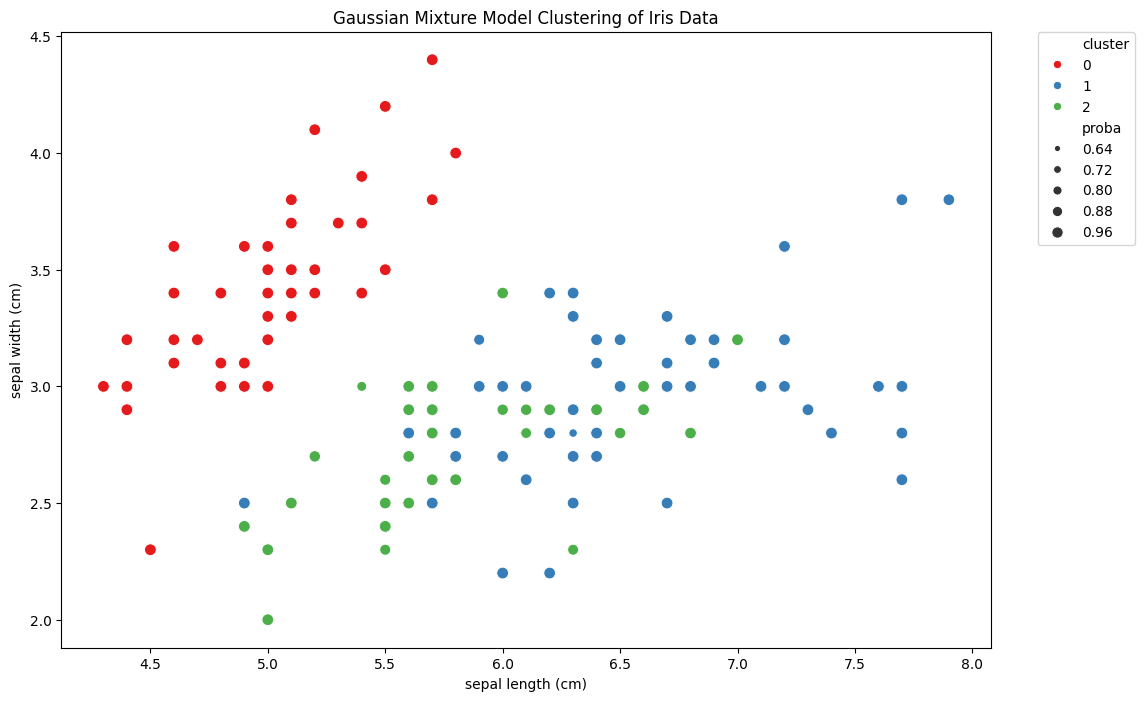

The number of iterations needed for convergence is: 17
The log likelihood value at convergence is: -1.2014746139064725


In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.mixture import GaussianMixture


iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['species'] = iris.target_names[iris.target]

#  GaussianMixture object with 3 components and full covariance
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=0)



# Fit the GaussianMixture object to the iris data
gmm.fit(data.iloc[:, :4])

# Predict the cluster labels and probabilities for each sample
data['cluster'] = gmm.predict(data.iloc[:, :4])
data['proba'] = gmm.predict_proba(data.iloc[:, :4]).max(axis=1)


plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x='sepal length (cm)', y='sepal width (cm)', hue='cluster', size='proba', palette='Set1')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Gaussian Mixture Model Clustering of Iris Data')
plt.show()

print("The number of iterations needed for convergence is:", gmm.n_iter_)
print("The log likelihood value at convergence is:", gmm.lower_bound_)